In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [3]:
df = pd.read_csv(
    '/kaggle/input/us-used-cars-dataset/used_cars_data.csv',
    parse_dates=['listed_date']
)

df = df[(df['price'] >= 500) &
        (df['price'] <= 200000)]

df.shape

(2997798, 66)

In [4]:
df.columns

Index(['vin', 'back_legroom', 'bed', 'bed_height', 'bed_length', 'body_type',
       'cabin', 'city', 'city_fuel_economy', 'combine_fuel_economy',
       'daysonmarket', 'dealer_zip', 'description', 'engine_cylinders',
       'engine_displacement', 'engine_type', 'exterior_color', 'fleet',
       'frame_damaged', 'franchise_dealer', 'franchise_make', 'front_legroom',
       'fuel_tank_volume', 'fuel_type', 'has_accidents', 'height',
       'highway_fuel_economy', 'horsepower', 'interior_color', 'isCab',
       'is_certified', 'is_cpo', 'is_new', 'is_oemcpo', 'latitude', 'length',
       'listed_date', 'listing_color', 'listing_id', 'longitude',
       'main_picture_url', 'major_options', 'make_name', 'maximum_seating',
       'mileage', 'model_name', 'owner_count', 'power', 'price', 'salvage',
       'savings_amount', 'seller_rating', 'sp_id', 'sp_name', 'theft_title',
       'torque', 'transmission', 'transmission_display', 'trimId', 'trim_name',
       'vehicle_damage_category', 'whe

# SQL Part

In [5]:
(
    df
    .groupby('city')['price']
    .agg(['median', 'std', 'size'])
    .rename(columns={
        'median': 'med_price',
        'std': 'std_price',
        'size': 'n_cars'
    })
    .sort_values('med_price', ascending=False)
).head(20)

,med_price,std_price,n_cars
city,,,
La Jolla,155999.0,25858.799706,11
Bryn Mawr,139995.0,39287.295957,7
Sunny Isles Beach,102450.0,74246.212025,2
Roslindale,96999.0,38183.766184,2
Middleburg HTS,92578.0,NaN,1
Parsippany-Troy Hills,72475.0,41963.645279,136
Rancho Mirage,69670.0,37088.576539,91
Saint Ann,67400.0,44131.680946,38
Marina Del Rey,66900.0,31503.198028,49


In [6]:
(
    df
    .groupby('franchise_make')['price']
    .agg(['median', 'std', 'size'])
    .rename(columns={
        'median': 'med_price',
        'std': 'std_price',
        'size': 'n_cars'
    })
    .sort_values('med_price', ascending=False)
).head(20)

,med_price,std_price,n_cars
franchise_make,,,
Pagani,134900.0,46631.534395,5
McLaren,131496.0,46057.833275,134
Ferrari,129900.0,43129.014513,158
Aston Martin,124900.0,64980.366781,331
Bentley,87836.0,54208.273001,435
Lamborghini,85898.0,61655.745958,104
Porsche,67998.0,40826.362511,10735
Freightliner,52699.0,14010.674279,54
Rover,52460.0,20076.162512,25


# Kesif & Analiz

## Eksik Data

In [7]:
missing_rows = df.isnull().sum().reset_index(name='n_rows')
missing_rows['ratio'] = missing_rows['n_rows'] / df.shape[0]
missing_rows.sort_values('ratio', ascending=False)

,index,n_rows,ratio
60,vehicle_damage_category,2997798,1.000000
9,combine_fuel_economy,2997798,1.000000
30,is_certified,2997798,1.000000
2,bed,2978230,0.993473
6,cabin,2934265,0.978807
...,...,...,...
19,franchise_dealer,0,0.000000
11,dealer_zip,0,0.000000
10,daysonmarket,0,0.000000
7,city,0,0.000000


In [8]:
display(missing_rows[missing_rows['ratio'] > 0.4].sort_values('ratio', ascending=False))

cols_to_drop = missing_rows[missing_rows['ratio'] > 0.4]['index'].values
cols_to_drop

,index,n_rows,ratio
9,combine_fuel_economy,2997798,1.000000
30,is_certified,2997798,1.000000
60,vehicle_damage_category,2997798,1.000000
2,bed,2978230,0.993473
6,cabin,2934265,0.978807
33,is_oemcpo,2862631,0.954911
31,is_cpo,2815160,0.939076
3,bed_height,2568703,0.856863
4,bed_length,2568703,0.856863
46,owner_count,1515977,0.505697


array(['bed', 'bed_height', 'bed_length', 'cabin', 'combine_fuel_economy',
       'fleet', 'frame_damaged', 'has_accidents', 'isCab', 'is_certified',
       'is_cpo', 'is_oemcpo', 'owner_count', 'salvage', 'theft_title',
       'vehicle_damage_category'], dtype=object)

In [9]:
df = df.drop(cols_to_drop, axis=1)
df.shape

(2997798, 50)

## Fiyat Analiz

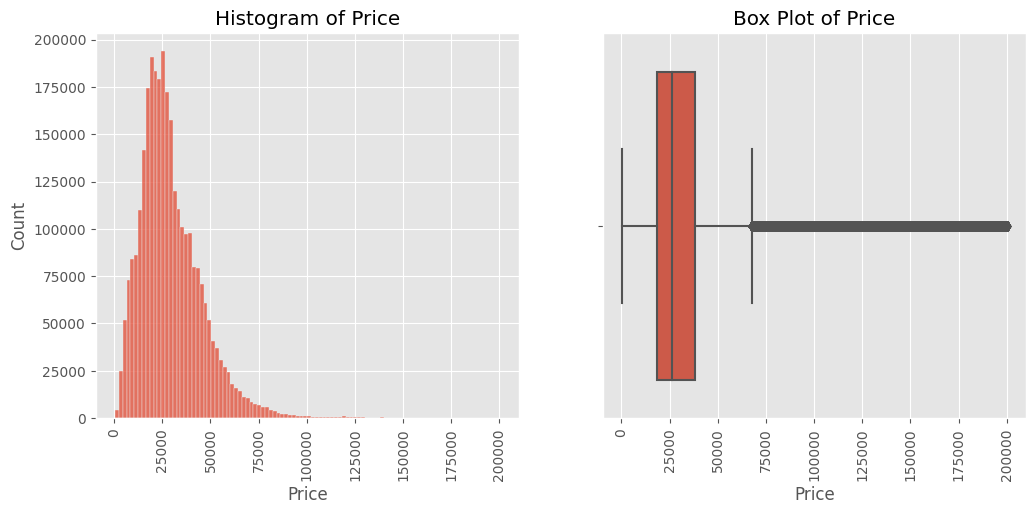

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(x='price', data=df, bins=100, ax=axes[0])
axes[0].set_xlabel('Price')
axes[0].set_title('Histogram of Price')
axes[0].tick_params(axis='x', rotation=90)

sns.boxplot(x='price', data=df, ax=axes[1])
axes[1].set_xlabel('Price')
axes[1].set_title('Box Plot of Price')
axes[1].tick_params(axis='x', rotation=90)

plt.show()

In [11]:
df['price'].median(), df['price'].mean(), df['price'].std()

(26461.0, 29730.340982490146, 16975.91847515382)

In [12]:
df['price'].quantile(0.25), df['price'].quantile(0.75)

(18445.0, 38175.0)

## Korelasyon

In [13]:
numerical_cols = df.select_dtypes(exclude='object').columns.tolist()
numerical_cols = [
    col for col in numerical_cols if col not in ['latitude', 'longitude',
                                                 'listing_id', 'sp_id',
                                                 'is_certified',
                                                 'vehicle_damage_category',
                                                 'combine_fuel_economy',
                                                 'owner_count']
]

In [14]:
df[numerical_cols].isnull().sum()

city_fuel_economy       490541
daysonmarket                 0
engine_displacement     172108
franchise_dealer             0
highway_fuel_economy    490541
horsepower              172108
is_new                       0
listed_date                  0
mileage                 144270
price                        0
savings_amount               0
seller_rating            40824
year                         0
dtype: int64

In [15]:
df = df.dropna()

### Heatmap

In [16]:
corr = df[numerical_cols].corr(method='spearman', numeric_only=True)
corr = corr.round(2)
corr['price']

city_fuel_economy      -0.52
daysonmarket            0.11
engine_displacement     0.46
franchise_dealer         NaN
highway_fuel_economy   -0.55
horsepower              0.68
is_new                  0.42
mileage                -0.46
price                   1.00
savings_amount         -0.34
seller_rating           0.10
year                    0.49
Name: price, dtype: float64

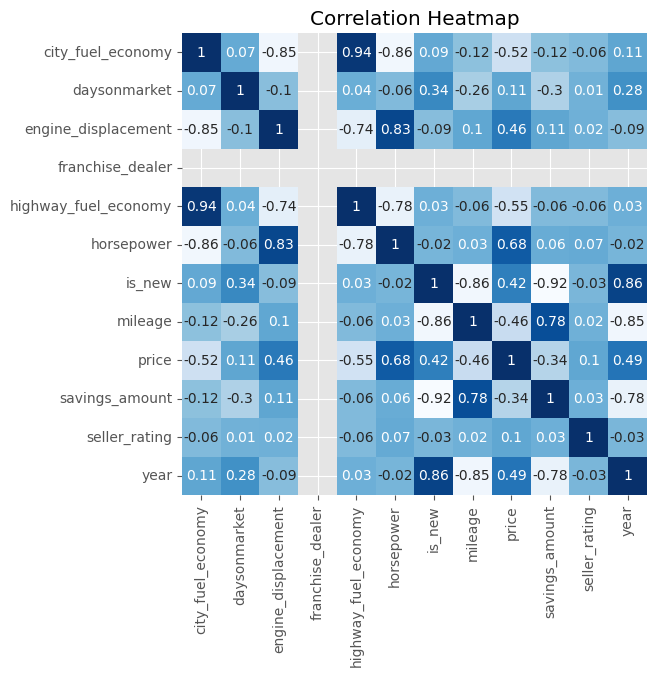

In [17]:
plt.figure(figsize=(6, 6))
sns.heatmap(corr, cmap='Blues', annot=True, cbar=False)

plt.title('Correlation Heatmap')
plt.show()

### Yil - Fiyat

In [18]:
df[['price', 'year']].corr(method='spearman')

,price,year
price,1.000000,0.491527
year,0.491527,1.000000


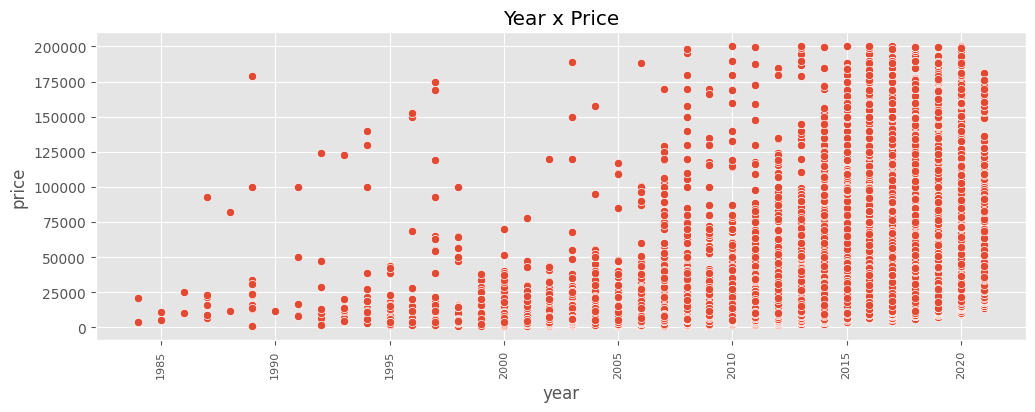

In [19]:
fig = plt.figure(figsize=(12, 4))

sns.scatterplot(x='year', y='price', data=df)
plt.title('Year x Price')
plt.xticks(rotation=90, fontsize=8)
plt.show()

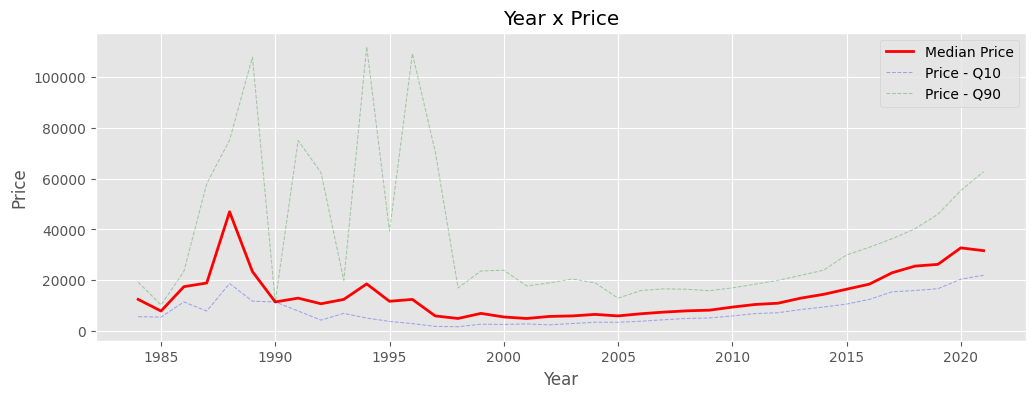

In [20]:
summ = (
    df
    .groupby("year")["price"]
    .agg([
        ("q25", lambda x: x.quantile(0.1)),
        ("median", lambda x: x.quantile(0.50)),
        ("q75", lambda x: x.quantile(0.90)),
    ])
).reset_index()

fig = plt.figure(figsize=(12, 4))

sns.lineplot(x='year', y='median', data=summ, label='Median Price', color='red', linewidth=2)
sns.lineplot(x='year', y='q25', data=summ, label='Price - Q10', color='blue', linewidth=0.75, linestyle='dashed', alpha=0.3)
sns.lineplot(x='year', y='q75', data=summ, label='Price - Q90', color='green', linewidth=0.75, linestyle='dashed', alpha=0.3)
    
plt.title('Year x Price')
plt.ylabel('Price')
plt.xlabel('Year')
plt.show()

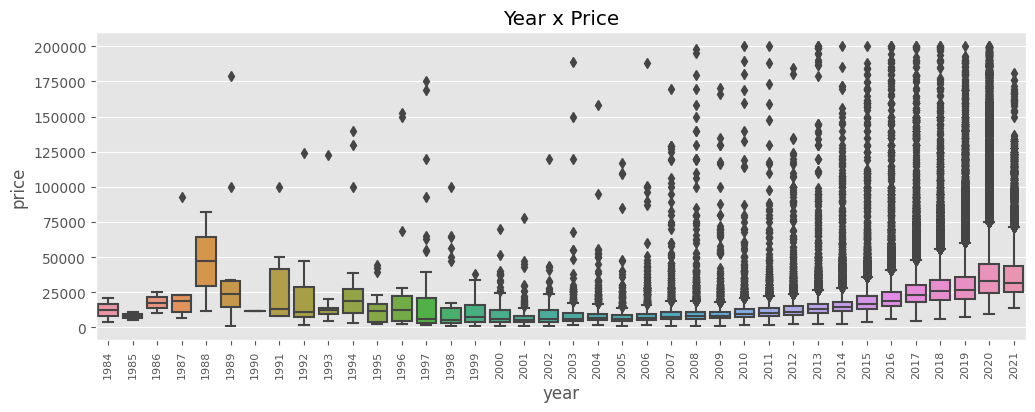

In [21]:
fig = plt.figure(figsize=(12, 4))

sns.boxplot(x='year', y='price', data=df)
plt.title('Year x Price')
plt.xticks(rotation=90, fontsize=8)
plt.show()

[]

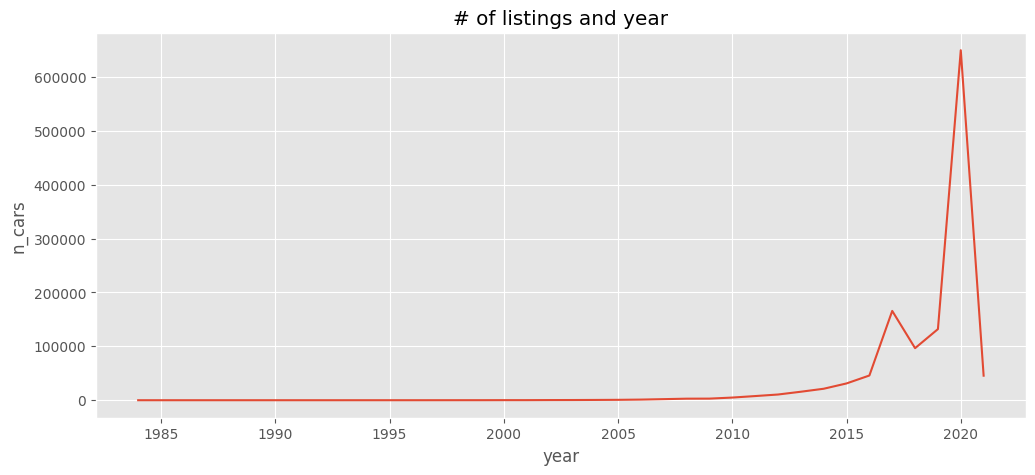

In [22]:
plt.figure(figsize=(12, 5))
sns.lineplot(x='year', y='n_cars', data=df['year'].value_counts().reset_index(name='n_cars'))
plt.title('# of listings and year')
plt.plot()

## KM - Fiyat

In [23]:
df = df.rename(columns={'mileage': 'km'})
df[['price', 'km']].corr(method='spearman')

,price,km
price,1.000000,-0.455536
km,-0.455536,1.000000


In [24]:
# Filtering out outliers
df_copy = df.copy()
df_copy = df_copy[df_copy['km'] < 600000]

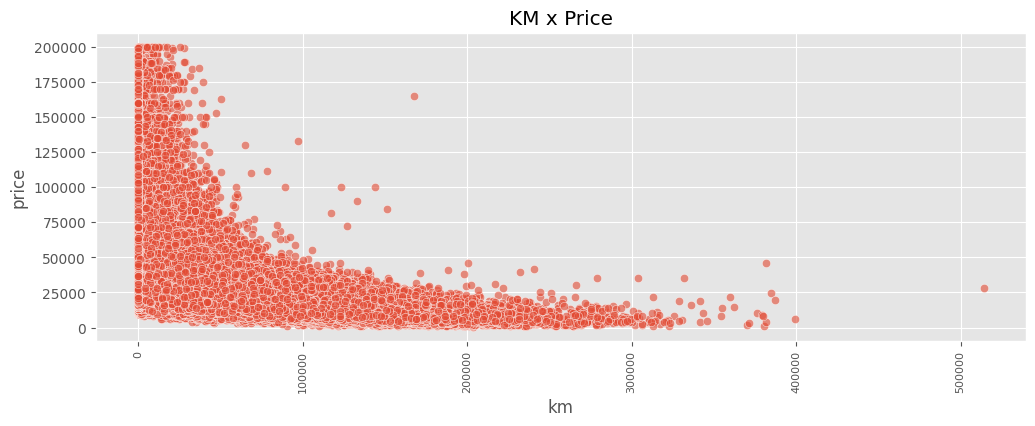

In [25]:
fig = plt.figure(figsize=(12, 4))

sns.scatterplot(x='km', y='price', data=df_copy, alpha=0.6)
plt.title('KM x Price')
plt.xticks(rotation=90, fontsize=8)
plt.show()

In [26]:
df_copy['km_bins'] = (
    df_copy['km'].transform(lambda x: pd.qcut(x, q=10, labels=False))
)

In [27]:
(
    df_copy
    .groupby(['km_bins'])['km']
    .mean()
)

km_bins
0        0.241587
1        2.881363
2        5.621534
3        9.732817
4       17.565498
5     4612.949278
6    19918.151066
7    31865.921634
8    46012.428140
9    96314.524997
Name: km, dtype: float64

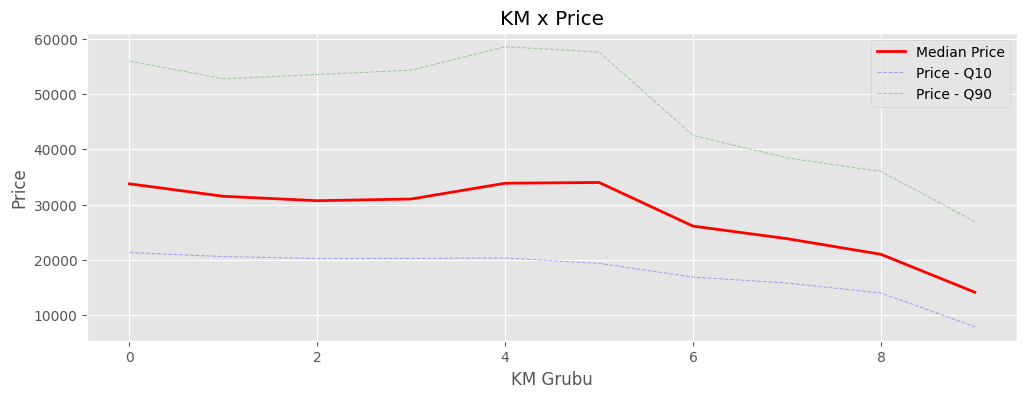

In [28]:
summ = (
    df_copy
    .groupby("km_bins")["price"]
    .agg([
        ("q25", lambda x: x.quantile(0.10)),
        ("median", lambda x: x.quantile(0.50)),
        ("q75", lambda x: x.quantile(0.90)),
    ])
).reset_index()

fig = plt.figure(figsize=(12, 4))
sns.lineplot(x='km_bins', y='median', data=summ, label='Median Price', color='red', linewidth=2)
sns.lineplot(x='km_bins', y='q25', data=summ, label='Price - Q10', color='blue', linewidth=0.75, linestyle='dashed', alpha=0.3)
sns.lineplot(x='km_bins', y='q75', data=summ, label='Price - Q90', color='green', linewidth=0.75, linestyle='dashed', alpha=0.3)
    
plt.title('KM x Price')
plt.ylabel('Price')
plt.xlabel('KM Grubu')
plt.show()